Find a dataset from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday) which has at least one column with `strings` as values.

Use `read_csv` to load the data into your R session. Give the tibble an informative variable name.

In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [14]:
drought = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-14/drought.csv", col_types=cols())

Make a bar chart of the frequency of values for one "categorical" column in the data you chose.

In [4]:
drought |> head(1)

0,DATE,D0,D1,D2,D3,D4,-9,W0,W1,W2,W3,W4,state
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,d_18950101,0,0,0,0,0,100,0,0,0,0,0,alabama


In [11]:
state = drought |>
    pull(state)

state%>% factor() %>% levels()
state |> table()

state |> fct_infreq() |> levels()

[1] "alabama"        "arizona"        "arkansas"       "california"    
 [5] "colorado"       "connecticut"    "delaware"       "florida"       
 [9] "georgia"        "idaho"          "illinois"       "indiana"       
[13] "iowa"           "kansas"         "kentucky"       "louisiana"     
[17] "maine"          "maryland"       "massachusetts"  "michigan"      
[21] "minnesota"      "mississippi"    "missouri"       "montana"       
[25] "nebraska"       "nevada"         "new-hampshire"  "new-jersey"    
[29] "new-mexico"     "new-york"       "north-carolina" "north-dakota"  
[33] "ohio"           "oklahoma"       "oregon"         "pennsylvania"  
[37] "rhode-island"   "south-carolina" "south-dakota"   "tennessee"     
[41] "texas"          "utah"           "vermont"        "virginia"      
[45] "washington"     "west-virginia"  "wisconsin"      "wyoming"

state
       alabama        arizona       arkansas     california       colorado 
          1528           1528           1528           1528           1528 
   connecticut       delaware        florida        georgia          idaho 
          1528           1528           1528           1528           1528 
      illinois        indiana           iowa         kansas       kentucky 
          1528           1528           1528           1528           1528 
     louisiana          maine       maryland  massachusetts       michigan 
          1528           1528           1528           1528           1528 
     minnesota    mississippi       missouri        montana       nebraska 
          1528           1528           1528           1528           1528 
        nevada  new-hampshire     new-jersey     new-mexico       new-york 
          1528           1528           1528           1528           1528 
north-carolina   north-dakota           ohio       oklahoma         oregon 
      

[1] "alabama"        "arizona"        "arkansas"       "california"    
 [5] "colorado"       "connecticut"    "delaware"       "florida"       
 [9] "georgia"        "idaho"          "illinois"       "indiana"       
[13] "iowa"           "kansas"         "kentucky"       "louisiana"     
[17] "maine"          "maryland"       "massachusetts"  "michigan"      
[21] "minnesota"      "mississippi"    "missouri"       "montana"       
[25] "nebraska"       "nevada"         "new-hampshire"  "new-jersey"    
[29] "new-mexico"     "new-york"       "north-carolina" "north-dakota"  
[33] "ohio"           "oklahoma"       "oregon"         "pennsylvania"  
[37] "rhode-island"   "south-carolina" "south-dakota"   "tennessee"     
[41] "texas"          "utah"           "vermont"        "virginia"      
[45] "washington"     "west-virginia"  "wisconsin"      "wyoming"

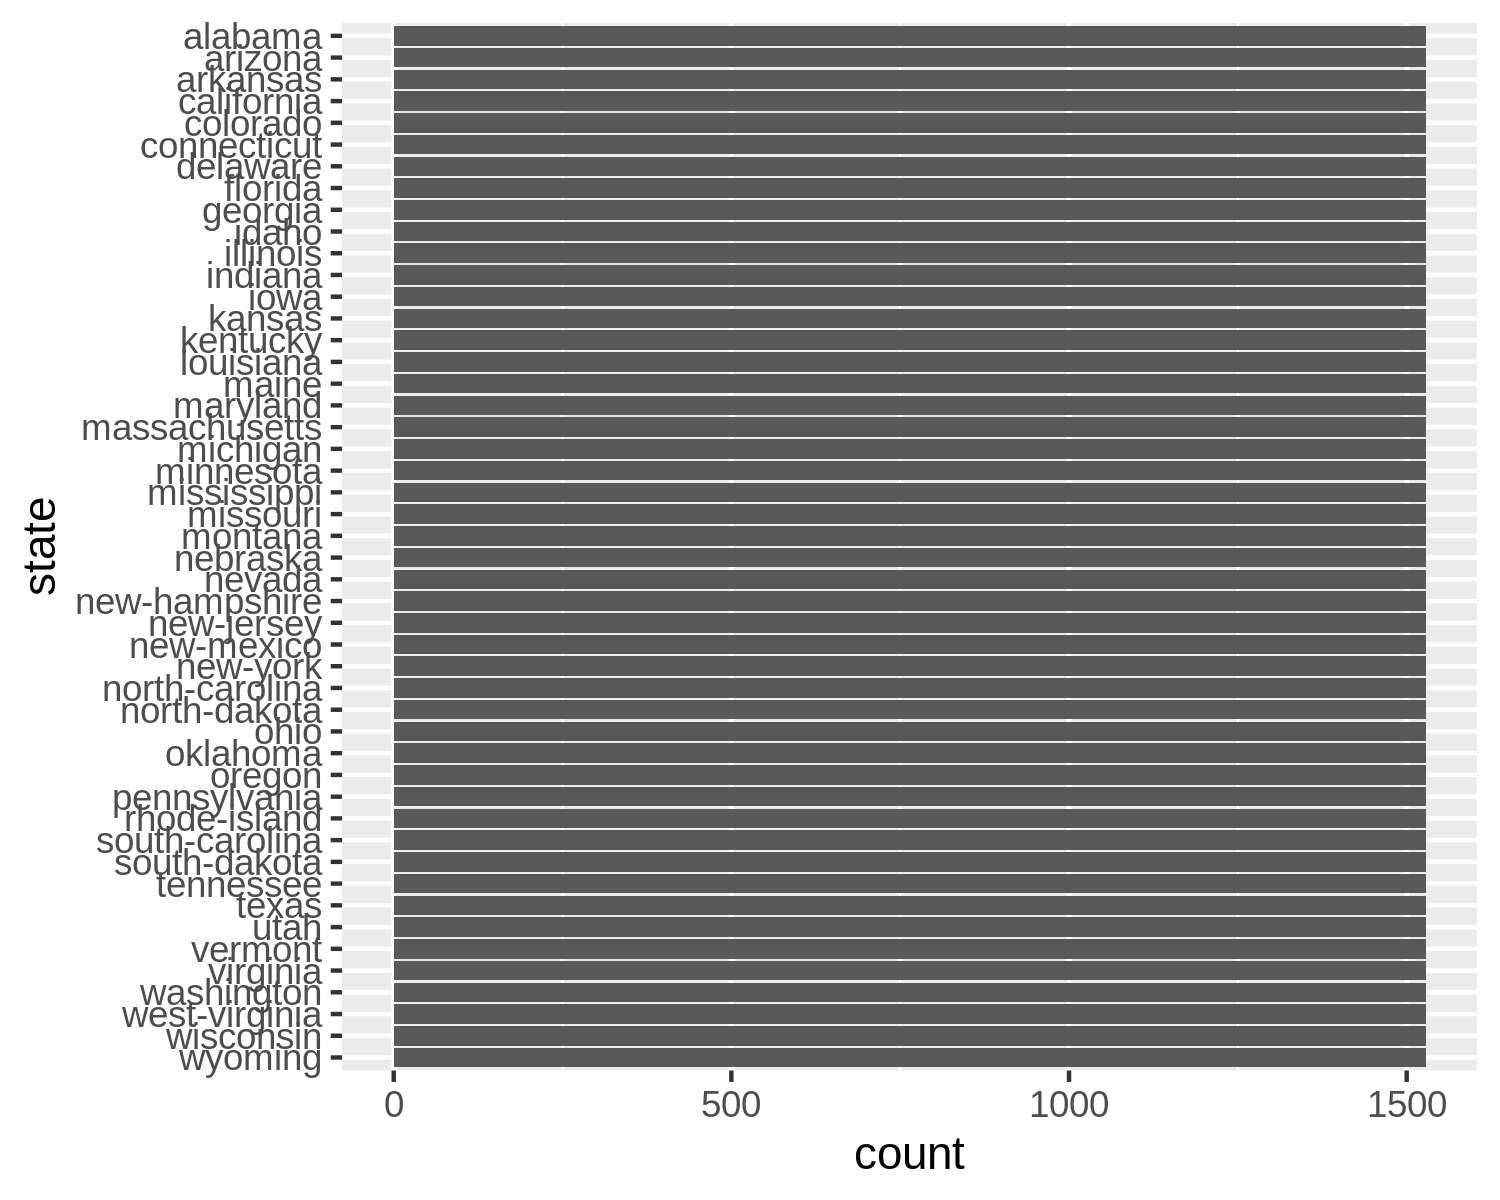

In [13]:
state2 = drought |> group_by(state) |>
    mutate(state_freq = n()) |>
    ungroup() |>
    arrange(desc(state_freq)) |>
    mutate(state = state |> fct_inorder() |>fct_rev())

p=ggplot(state2, aes(y=state)) + geom_bar()
p

In [22]:
#the way professor did it

# drought2 = drought |> select(state) |>
#     mutate(state=state |> fct_infreq() |> fct_rev()) |> fct_relevel("north-carolina", after = 2)
           
# p = ggplot(drought2, aes(y=state)) + geom_bar()
# p

# professor's code
volcano = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv',
    col_types = cols()
) 

volcano2 = volcano |> 
    select(volcano_name, region, last_eruption_year) |>
    mutate(region = region |> 
               fct_lump(n = 12) |> 
               fct_infreq() |> fct_rev() |> 
               fct_relevel('Other'))
    
p = ggplot(volcano2, aes(y = region)) + geom_bar()
           
p

## 🛑 wait for the `forcats` lecture before moving to the next step...

Using `forcats` functions, plot an ordered example of your bar chart from above. Don't forget to "lump" low frequency values.